In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/object_detection_file/yolov5_3

/content/gdrive/MyDrive/object_detection_file/yolov5_3


In [ ]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 15305, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 15305 (delta 0), reused 3 (delta 0), pack-reused 15300
Receiving objects: 100% (15305/15305), 14.19 MiB | 15.56 MiB/s, done.
Resolving deltas: 100% (10493/10493), done.


In [ ]:
%cd /content/gdrive/MyDrive/object_detection_file/yolov5_3/yolov5

/content/gdrive/MyDrive/object_detection_file/yolov5_3/yolov5


In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 7.9 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
cvxpy 1.2.3 requires setuptools<=64.0.2, but you have setuptools 67.6.0 which is incompatible.


In [ ]:
import torch
from IPython.display import Image, clear_output

In [ ]:
%cd /content/gdrive/MyDrive/object_detection_file/yolov5_3/yolov5

/content/gdrive/MyDrive/object_detection_file/yolov5_3/yolov5


In [ ]:
%cat ./data/coco128.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license
# COCO128 dataset https://www.kaggle.com/ultralytics/coco128 (first 128 images from COCO train2017) by Ultralytics
# Example usage: python train.py --data coco128.yaml
# parent
# ├── yolov5
# └── datasets
#     └── coco128  ← downloads here (7 MB)


# Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]
path: ../datasets/coco128  # dataset root dir
train: images/train2017  # train images (relative to 'path') 128 images
val: images/train2017  # val images (relative to 'path') 128 images
test:  # test images (optional)

# Classes
names:
  0: person
  1: bicycle
  2: car
  3: motorcycle
  4: airplane
  5: bus
  6: train
  7: truck
  8: boat
  9: traffic light
  10: fire hydrant
  11: stop sign
  12: parking meter
  13: bench
  14: bird
  15: cat
  16: dog
  17: horse
  18: sheep
  19: cow
  20: elephant
  21: bear
  22: zebra
  23: giraffe
  24: backpack
  25: umbrella
  26: handba

In [ ]:
%cat /content/gdrive/MyDrive/object_detection_file/yolov5_3/data.yaml


path: /content/gdrive/MyDrive/object_detection_file/yolov5_3/Dataset
train: images/train
val: images/valid

nc:  7

# Classes
names:
  0: person
  1: cow
  2: car
  3: bike
  4: auto
  5: poll
  6: stall


In [ ]:
%cat ./models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]]

In [ ]:
import yaml
with open('../data.yaml', mode = 'r') as f:
  num_of_classes = str(yaml.safe_load(f)["nc"])
  print(num_of_classes)

7


In [ ]:
from IPython.core.magic import (register_line_magic, register_cell_magic,
                                register_line_cell_magic)
@register_line_cell_magic
def write_template(line, cell):
  print("this is a line : \n", line)
  print("this is a cell : \n",cell)
  with open(line , mode = 'w') as f:
    f.write(cell.format(**globals())) # globals poore cell ko dictionary form me convert kr deta hai,
    # f.write us dictionary ko utha k line wali file me daal dega aur pehle wali file ke content ko replace kr denge....

In [ ]:
%%write_template ./models/custom_yolov5s.yaml

#parameters
nc: {num_of_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, C3, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, C3, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

this is a line : 
 ./models/custom_yolov5s.yaml
this is a cell : 
 
#parameters
nc: {num_of_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nea

In [ ]:
%cat /content/gdrive/MyDrive/object_detection_file/yolov5_3/yolov5/models/custom_yolov5s.yaml


#parameters
nc: 7  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, Fal

In [ ]:
! python train.py --epochs 100 --img 416 --batch 3 --data '../data.yaml' --cfg './models/custom_yolov5s.yaml' --name trained_yolo5s_result --cache

requirements: YOLOv5 requirement "gitpython" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 6.7 MB/s eta 0:00:00

requirements: 1 package updated per ['gitpython']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

train: weights=yolov5s.pt, cfg=./models/custom_yolov5s.yaml, data=../data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=3, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=trained_yolo5s_result, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period

In [ ]:
%cd /content/gdrive/MyDrive/object_detection_file/yolov5_3/yolov5

/content/gdrive/MyDrive/object_detection_file/yolov5_3/yolov5


In [ ]:
! python detect.py --img 416 --conf 0.2 --weights ./runs/train/trained_yolo5s_result4/weights/best.pt --source /content/gdrive/MyDrive/object_detection_file/yolov5_3/Dataset/images/valid

detect: weights=['./runs/train/trained_yolo5s_result4/weights/best.pt'], source=/content/gdrive/MyDrive/object_detection_file/yolov5_3/Dataset/images/valid, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.2, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: YOLOv5 requirements "gitpython>=3.1.30" "setuptools>=65.5.1" not found, attempting AutoUpdate...
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
cvxpy 1.3.0 requires setuptools<=64.0.2, but you have setuptools 67.6.0 which is incompatible.
Looking i

In [ ]:
! python export.py --weights runs/train/trained_yolo5s_result4/weights/best.pt --include tflite --int8 --img 300 --data '../data.yaml'

usage: export.py
       [-h]
       [--data DATA]
       [--weights WEIGHTS [WEIGHTS ...]]
       [--imgsz IMGSZ [IMGSZ ...]]
       [--batch-size BATCH_SIZE]
       [--device DEVICE]
       [--half]
       [--inplace]
       [--keras]
       [--optimize]
       [--int8]
       [--dynamic]
       [--simplify]
       [--opset OPSET]
       [--verbose]
       [--workspace WORKSPACE]
       [--nms]
       [--agnostic-nms]
       [--topk-per-class TOPK_PER_CLASS]
       [--topk-all TOPK_ALL]
       [--iou-thres IOU_THRES]
       [--conf-thres CONF_THRES]
       [--include INCLUDE [INCLUDE ...]]
export.py: error: unrecognized arguments: --uint8


In [ ]:
! python detect.py --img 416 --conf 0.2 --weights /content/gdrive/MyDrive/object_detection_file/yolov5_3/yolov5/runs/train/trained_yolo5s_result4/weights/best-fp16.tflite --source /content/gdrive/MyDrive/object_detection_file/yolov5_3/Dataset/images/valid --data /content/gdrive/MyDrive/object_detection_file/yolov5_3/data.yaml

detect: weights=['/content/gdrive/MyDrive/object_detection_file/yolov5_3/yolov5/runs/train/trained_yolo5s_result4/weights/best-fp16.tflite'], source=/content/gdrive/MyDrive/object_detection_file/yolov5_3/Dataset/images/valid, data=/content/gdrive/MyDrive/object_detection_file/yolov5_3/data.yaml, imgsz=[416, 416], conf_thres=0.2, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-120-g3e55763 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

2023-03-18 14:37:12.491564: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX

In [ ]:
!pip uninstall -y tensorboard tb-nightly &&
!pip install tb-nightly  # must have at least tb-nightly==2.5.0a20210316

/bin/bash: -c: line 1: syntax error: unexpected end of file
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 69.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 60.8 MB/s eta 0:00:00
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.6.1
    Uninstalling tensorboard-data-server-0.6.1:
      Successfully uninstalled tensorboard-data-server-0.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorboard 2.11.2 requires tensorboard-data-server<0.7.0,>=0.6.0, but you have tensorboard-data-server 0.7.0 which is incompatible.


In [ ]:
%load_ext tensorboard
# %reload_ext tensorboard
%tensorboard --logdir runs/train/trained_yolo5s_result4

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
2023-03-16 09:08:17.780780: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-16 09:08:18.706205: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.9/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2023-03-16 09:08:18.706332: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; L

In [ ]:
Image(filename = "/content/gdrive/MyDrive/object_detection_file/yolov5_3/yolov5/runs/train/trained_yolo5s_result5/val_batch1_pred.jpg", width = 1000)

FileNotFoundError: ignored

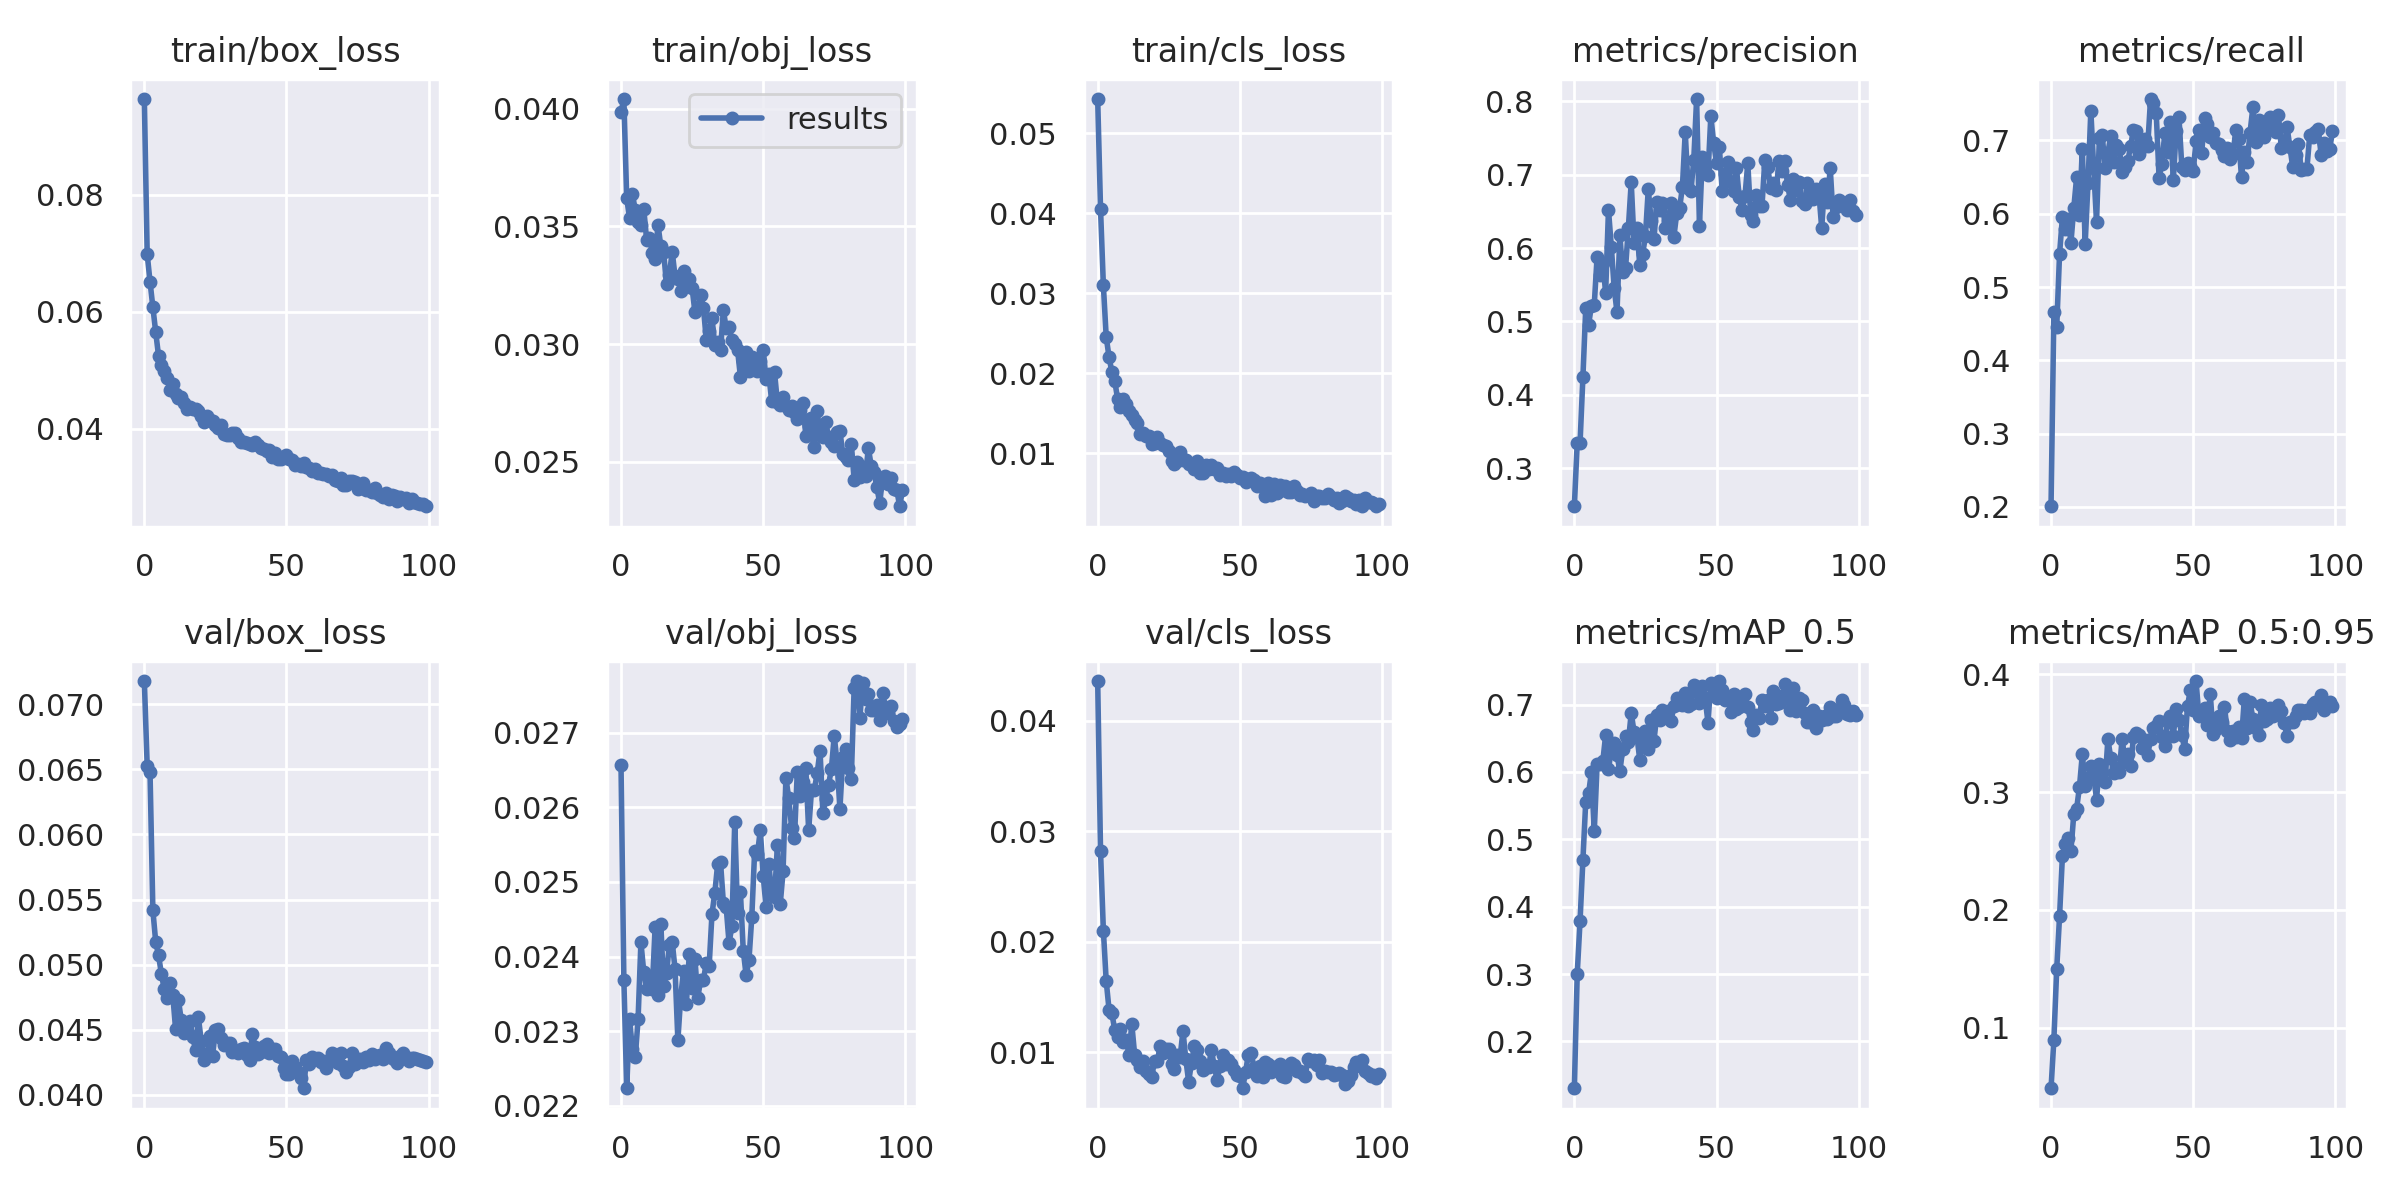

In [ ]:
Image(filename = "/content/gdrive/MyDrive/object_detection_file/yolov5_3/yolov5/runs/train/trained_yolo5s_result4/results.png", width = 1000)

In [ ]:
from utils.plots import plot_results
plot_results('/content/gdrive/MyDrive/object_detection_file/yolov5_3/yolov5/runs/train/trained_yolo5s_result3/results.csv')

In [ ]:
!pip install onnx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 4.7 MB/s 


In [ ]:
import onnx

In [ ]:
!python export.py --weights ./runs/train/trained_yolo5s_result5/weights/best.pt --include onnx

export: data=data/coco128.yaml, weights=['./runs/train/trained_yolo5s_result5/weights/best.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, train=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=12, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['onnx']
YOLOv5 🚀 v6.2-69-gfef1913 Python-3.7.13 torch-1.12.1+cu113 CPU

Fusing layers... 
custom_YOLOv5s summary: 213 layers, 7037095 parameters, 0 gradients

PyTorch: starting from runs/train/trained_yolo5s_result5/weights/best.pt with output shape (1, 25200, 15) (13.7 MB)

ONNX: starting export with onnx 1.12.0...
ONNX: export success ✅ 2.7s, saved as runs/train/trained_yolo5s_result5/weights/best.onnx (27.3 MB)

Export complete (12.2s)
Results saved to /content/gdrive/MyDrive/object_detection_file/yolov5_2/yolov5/runs/train/trained_yolo5s_result5/weights
Detect:          python detect.py --we

In [ ]:
import cv2